# Clustering

In [3]:
import pandas as pd
import numpy as np
dt = pd.read_table('cereal_r.dat', sep='\s+')
dt.head()

,Brand,Manufacturer,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugar,Potassium
0,Cheerios,G,110,6,2,290,2.0,17.0,1,105
1,CocoaPuffs,G,110,1,1,180,0.0,12.0,13,55
2,CountChocula,G,110,1,1,180,0.0,12.0,13,65
3,GoldenGrahams,G,110,1,1,280,0.0,15.0,9,45
4,HoneyNutCheerios,G,110,3,1,250,1.5,11.5,10,90


In [4]:
use = dt.drop(['Brand', 'Manufacturer'], axis=1)

In [23]:
use.shape

(26, 8)

In [79]:
labels = list(dt.Brand.values)

## 1) Single linkage clustering

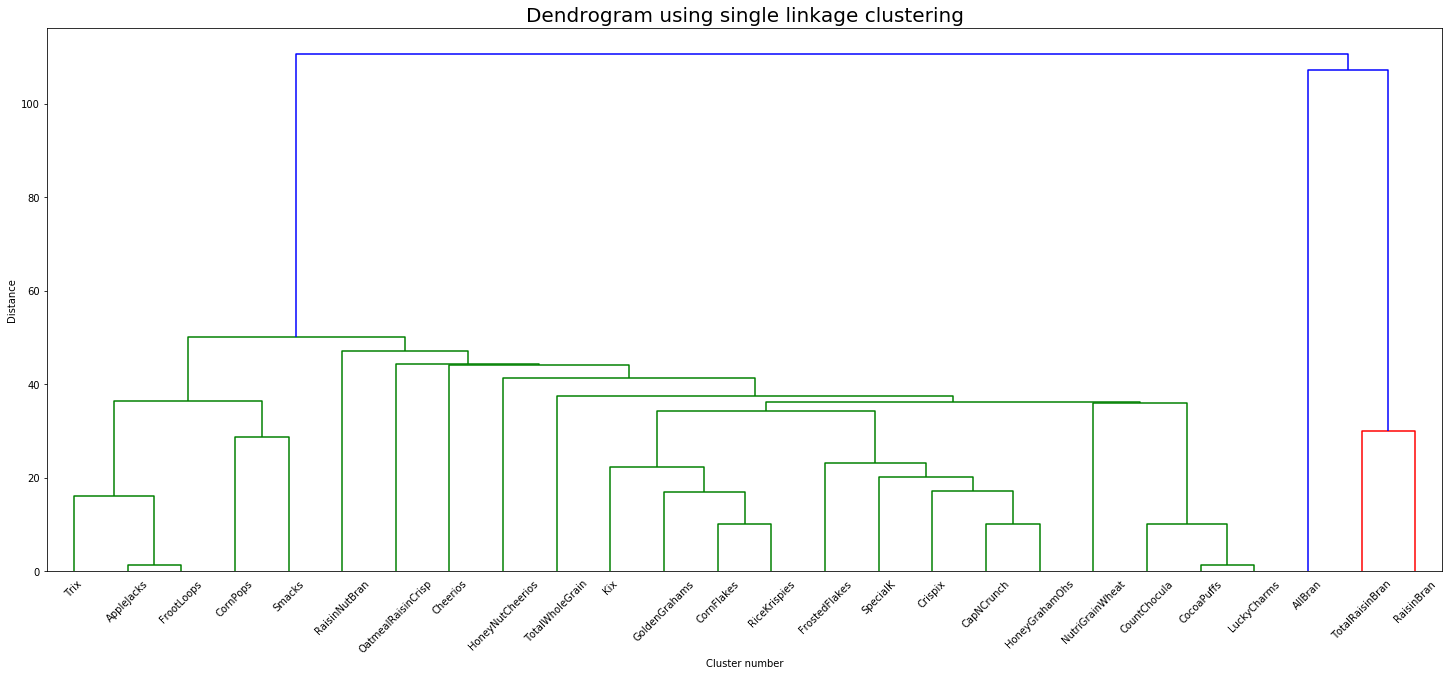

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='single')  # single linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using single linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

## 2) Complete linkage clustering

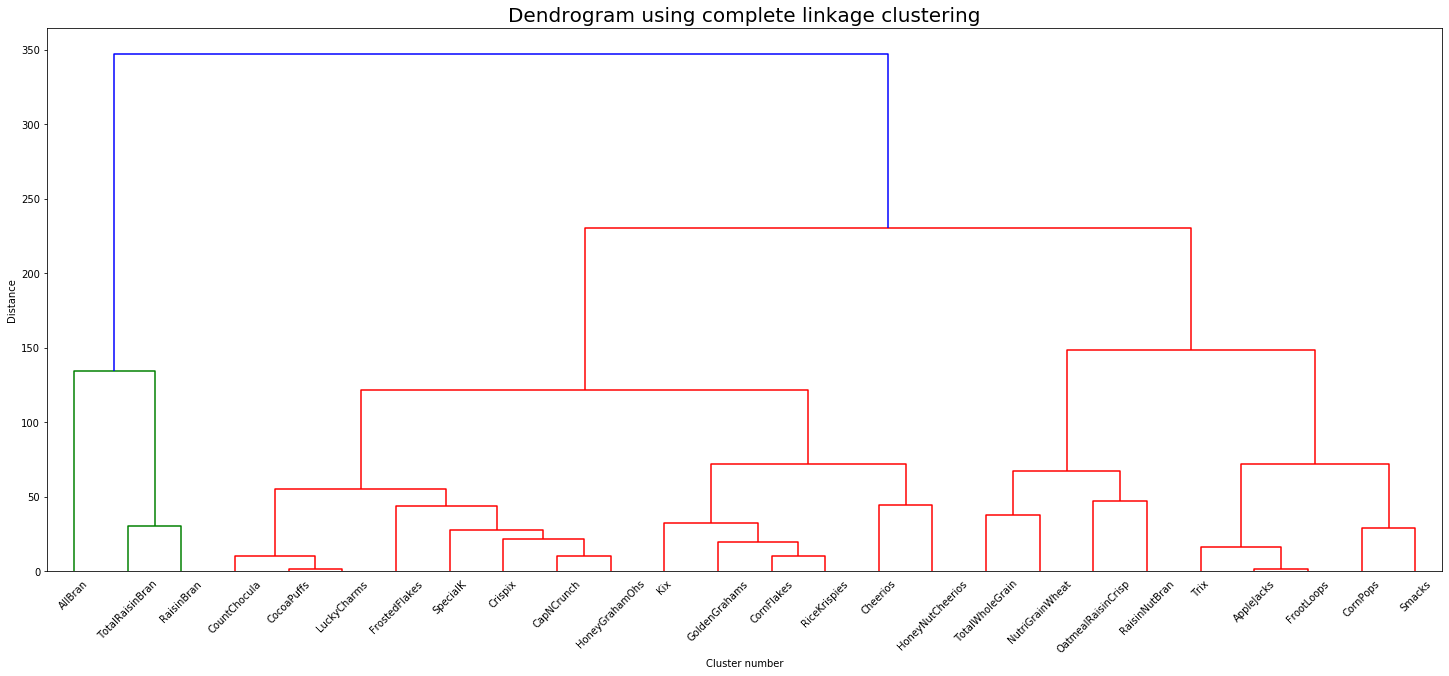

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='complete')  # single linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using complete linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

## 3) Global average clustering

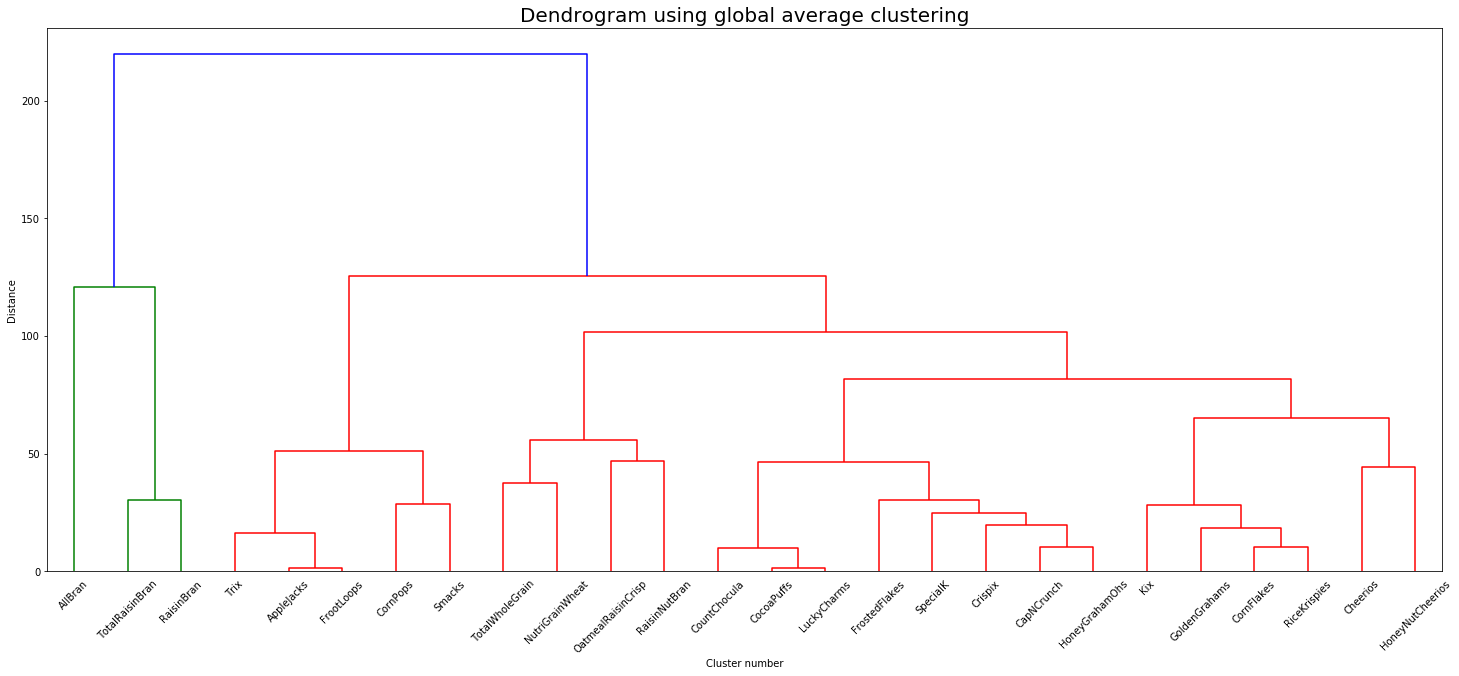

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='average')  # single linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using global average clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

In [36]:
# # sklearn
# from sklearn.cluster import AgglomerativeClustering
# model = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='single')
# pred = model.fit_predict(use)

## 4) K-means

In [84]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0).fit_predict(use)

In [87]:
km

array([2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 2, 2])

In [88]:
dt['kmeans'] = km

In [103]:
print('Group1 : ', dt.query('kmeans==0')['Brand'].values)
print('='*70)
print('Group2 : ', dt.query('kmeans==1')['Brand'].values)
print('='*70)
print('Group3 : ', dt.query('kmeans==2')['Brand'].values)

Group1 :  ['CocoaPuffs' 'CountChocula' 'LuckyCharms' 'OatmealRaisinCrisp'
 'RaisinNutBran' 'TotalWholeGrain' 'Trix' 'AppleJacks' 'CornPops'
 'FrootLoops' 'NutriGrainWheat' 'Smacks']
Group2 :  ['TotalRaisinBran' 'AllBran' 'RaisinBran']
Group3 :  ['Cheerios' 'GoldenGrahams' 'HoneyNutCheerios' 'Kix' 'CornFlakes'
 'Crispix' 'FrostedFlakes' 'RiceKrispies' 'SpecialK' 'CapNCrunch'
 'HoneyGrahamOhs']
